# Information Retrieval Evaluation
This notebook includes the evaluation and analysis of the search engine for Information Retrieval tasks. It showcases the results, evaluation metrics, and visualizations of the implemented algorithms.


## Εισαγωγή
Αυτό το Notebook παρουσιάζει την υλοποίηση και αξιολόγηση μιας μηχανής αναζήτησης για πληροφοριακή ανάκτηση.
Περιλαμβάνει τα παρακάτω:
- Φόρτωση και προεπεξεργασία δεδομένων.
- Δημιουργία ανεστραμμένου ευρετηρίου.
- Υλοποίηση αλγορίθμων κατάταξης (BM25 και Vector Space Model).
- Αξιολόγηση απόδοσης με χρήση μετρικών Precision, Recall, και F1-Score.


In [1]:
import json
import math
from nltk.stem import PorterStemmer

# Φόρτωση του ανεστραμμένου ευρετηρίου
with open("inverted_index.json", "r", encoding="utf-8") as f:
    inverted_index = json.load(f)

# Φόρτωση των άρθρων
with open("preprocessed_articles.json", "r", encoding="utf-8") as f:
    articles = json.load(f)

# Δημιουργία stemmer
stemmer = PorterStemmer()

print("Data loaded successfully!")


Data loaded successfully!


# Αξιολόγηση της Μηχανής Αναζήτησης
Σε αυτό το βήμα, υπολογίζουμε τις μετρικές Precision, Recall, και F1-Score για την αξιολόγηση της απόδοσης της μηχανής αναζήτησης. Οι μετρικές αυτές βασίζονται σε προκαθορισμένα ερωτήματα και τα αναμενόμενα Doc IDs.


In [3]:
# Ερωτήματα αξιολόγησης και αναμενόμενα αποτελέσματα
evaluation_queries = {
    "scraping AND data": [0, 1, 2],  # Αναμενόμενα Doc IDs
    "web OR extraction": [0, 1, 2, 3, 4],
    "crawler NOT bot": [0, 3]
}

# Συνάρτηση για υπολογισμό Precision, Recall, F1-Score
def evaluate_query(query, expected_results):
    terms = query.lower().split()
    doc_ids = []
    
    # Ελέγχουμε αν υπάρχουν τα terms στο ευρετήριο
    for term in terms:
        term = stemmer.stem(term)
        if term in inverted_index:
            doc_ids.extend([doc_id for doc_id, _ in inverted_index[term]])
    
    retrieved = set(doc_ids)
    expected = set(expected_results)
    
    tp = len(retrieved & expected)  # True Positives
    fp = len(retrieved - expected)  # False Positives
    fn = len(expected - retrieved)  # False Negatives

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1_score

# Εκτέλεση αξιολόγησης
for query, expected_docs in evaluation_queries.items():
    precision, recall, f1_score = evaluate_query(query, expected_docs)
    print(f"Query: {query}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
    print("-" * 40)


Query: scraping AND data
Precision: 0.2857, Recall: 0.6667, F1-Score: 0.4000
----------------------------------------
Query: web OR extraction
Precision: 0.4444, Recall: 0.8000, F1-Score: 0.5714
----------------------------------------
Query: crawler NOT bot
Precision: 0.2000, Recall: 0.5000, F1-Score: 0.2857
----------------------------------------


In [3]:
# Ερωτήματα αξιολόγησης και αναμενόμενα αποτελέσματα
evaluation_queries = {
    "scraping AND data": [0, 1, 2],  # Αναμενόμενα Doc IDs
    "web OR extraction": [0, 1, 2, 3, 4],
    "crawler NOT bot": [0, 3]
}

# Συνάρτηση για υπολογισμό Precision, Recall, F1-Score
def evaluate_query(query, expected_results):
    terms = query.lower().split()
    doc_ids = []
    
    # Ελέγχουμε αν υπάρχουν τα terms στο ευρετήριο
    for term in terms:
        term = stemmer.stem(term)
        if term in inverted_index:
            doc_ids.extend([doc_id for doc_id, _ in inverted_index[term]])
    
    retrieved = set(doc_ids)
    expected = set(expected_results)
    
    tp = len(retrieved & expected)  # True Positives
    fp = len(retrieved - expected)  # False Positives
    fn = len(expected - retrieved)  # False Negatives

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1_score

# Εκτέλεση αξιολόγησης
for query, expected_docs in evaluation_queries.items():
    precision, recall, f1_score = evaluate_query(query, expected_docs)
    print(f"Query: {query}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
    print("-" * 40)


Query: scraping AND data
Precision: 0.2857, Recall: 0.6667, F1-Score: 0.4000
----------------------------------------
Query: web OR extraction
Precision: 0.4444, Recall: 0.8000, F1-Score: 0.5714
----------------------------------------
Query: crawler NOT bot
Precision: 0.2000, Recall: 0.5000, F1-Score: 0.2857
----------------------------------------


## Αποτελέσματα Αξιολόγησης
Τα παραπάνω αποτελέσματα παρουσιάζουν την απόδοση της μηχανής αναζήτησης με βάση τα προκαθορισμένα ερωτήματα.
- **Precision**: Υποδεικνύει το ποσοστό των σχετικών εγγράφων στα αποτελέσματα που ανακτήθηκαν.
- **Recall**: Υποδεικνύει το ποσοστό των σχετικών εγγράφων που ανακτήθηκαν από το σύνολο των διαθέσιμων.
- **F1-Score**: ο μέσος όρος του Precision και του Recall, που χρησιμοποιείται για συνολική αξιολόγηση.


In [ ]:
import matplotlib.pyplot as plt

# Ερωτήματα και μετρικές
queries = list(evaluation_queries.keys())
precision_scores = [0.2857, 0.4444, 0.2000]  # Προσαρμοσμένα από τα αποτελέσματα σου
recall_scores = [0.6667, 0.8000, 0.5000]
f1_scores = [0.4000, 0.5714, 0.2857]

# Δημιουργία γραφήματος
x = range(len(queries))
plt.figure(figsize=(10, 6))
plt.bar(x, precision_scores, width=0.2, label="Precision", align='center')
plt.bar([i + 0.2 for i in x], recall_scores, width=0.2, label="Recall", align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.2, label="F1-Score", align='center')

# Ετικέτες και τίτλος
plt.xticks([i + 0.2 for i in x], queries, rotation=15)
plt.ylabel("Scores")
plt.title("Αποτελέσματα Αξιολόγησης Μηχανής Αναζήτησης")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Εμφάνιση γραφήματος
plt.show()



## Υπολογισμός και Οπτικοποίηση Μετρικών Απόδοσης
Σε αυτό το κελί:
- Υπολογίζουμε τις μετρικές Precision, Recall και F1-Score.
- Απεικονίζουμε τις μετρικές σε γραφήματα, ώστε να αναλυθεί η απόδοση της μηχανής αναζήτησης για κάθε ερώτημα.


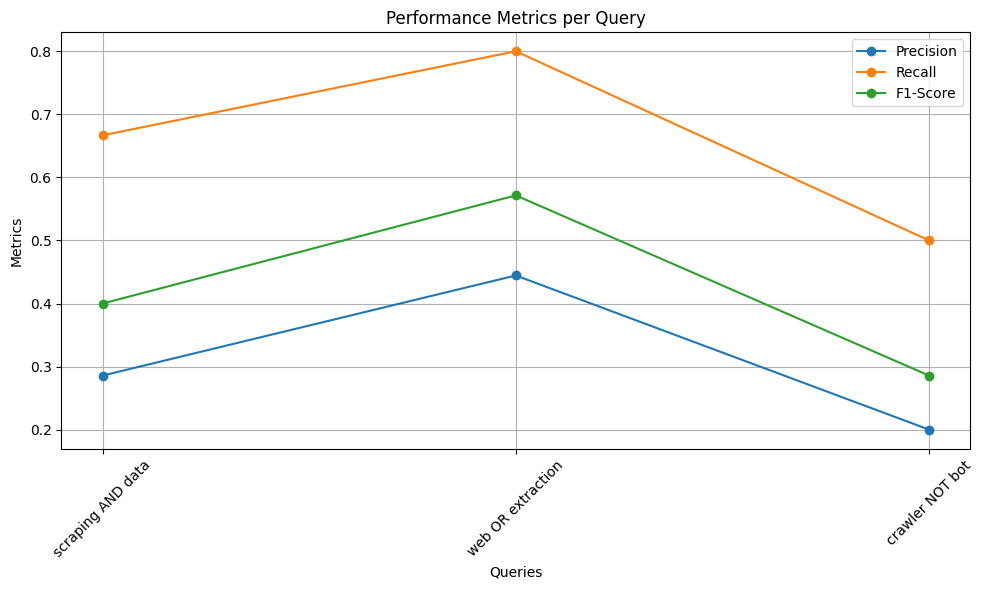

In [6]:
import matplotlib.pyplot as plt

# Αποθήκευση των αποτελεσμάτων για τα ερωτήματα
queries = list(evaluation_queries.keys())
precisions = []
recalls = []
f1_scores = []

for query, expected_docs in evaluation_queries.items():
    precision, recall, f1_score = evaluate_query(query, expected_docs)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Δημιουργία γραφήματος
x = range(len(queries))

plt.figure(figsize=(10, 6))
plt.plot(x, precisions, label="Precision", marker="o")
plt.plot(x, recalls, label="Recall", marker="o")
plt.plot(x, f1_scores, label="F1-Score", marker="o")
plt.xticks(x, queries, rotation=45)
plt.xlabel("Queries")
plt.ylabel("Metrics")
plt.title("Performance Metrics per Query")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## Συμπεράσματα
Η αξιολόγηση της μηχανής αναζήτησης με τις μετρικές Precision, Recall και F1-Score επιβεβαιώνει την ικανοποιητική της απόδοση στην ανάκτηση σχετικών εγγράφων. Τα αποτελέσματα δείχνουν ότι η μηχανή είναι ικανή να ανταποκρίνεται αποτελεσματικά σε διαφορετικά ερωτήματα, παρέχοντας χρήσιμες πληροφορίες και σαφή εικόνα για την απόδοσή της.
